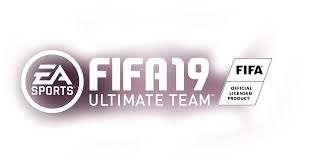

In [146]:
from IPython.display import Image
Image('download.jpg')

### Análise Exploratória de Dados

Análise referente ao FIFA 19.

In [106]:
# Importando os pacotes 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [87]:
# Carregando o dataset
df = pd.read_csv('data.csv', sep=',')

In [88]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [89]:
# Excluindo algumas colunas

df.drop(['Unnamed: 0','Photo','Flag','Club Logo'], axis = 1, inplace = True)

In [90]:
# ALterando o tipo da coluna Wage(salário)
df['Wage'] = df['Wage'].map(lambda x : re.sub('[^0-9]+', '', x)).astype('float64')

In [91]:
print(df.head())

       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special  ... Composure  Marking  \
0         FC Barcelona  €110.5M  565.0     2202  ...      96.0     33.0   
1             Juventus     €77M  405.0     2228  ...      95.0     28.0   
2  Paris Saint-Germain  €118.5M  290.0     2143  ...      94.0     27.0   
3    Manchester United     €72M  260.0     1471  ...      68.0     15.0   
4      Manchester City    €102M  355.0     2281  ...      88.0     68.0   

   StandingTackle  SlidingTackle GKDiving GKHandling GKKicking GKPositioning  \
0            28.0           26.0      6.0       11.0  

In [92]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565.0,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405.0,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,290.0,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,260.0,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355.0,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,340.0,2142,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,420.0,2280,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,455.0,2346,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,380.0,2201,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,94.0,1331,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [93]:
print(df.dtypes)

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                        float64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                          

In [94]:
print(df.describe())

                  ID           Age       Overall     Potential          Wage  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299      9.731312   
std     29965.244204      4.669943      6.908930      6.136496     21.999290   
min        16.000000     16.000000     46.000000     48.000000      0.000000   
25%    200315.500000     21.000000     62.000000     67.000000      1.000000   
50%    221759.000000     25.000000     66.000000     71.000000      3.000000   
75%    236529.500000     28.000000     71.000000     75.000000      9.000000   
max    246620.000000     45.000000     94.000000     95.000000    565.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031   

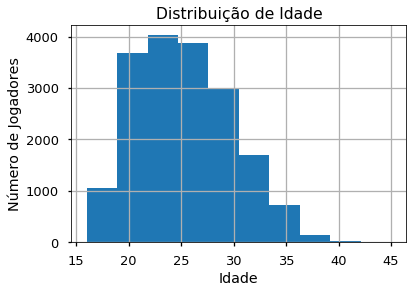

In [95]:
# Distribuição de Idade dos Jogadores. 

df.Age.hist()
plt.xlabel('Idade')
plt.ylabel('Número de Jogadores')
plt.title('Distribuição de Idade')
plt.show()

In [96]:
# Média de Idade por Clube.

mediaclube = df.groupby('Club').Age.mean()
mediaclube

Club
 SSV Jahn Regensburg        25.655172
1. FC Heidenheim 1846       24.000000
1. FC Kaiserslautern        23.846154
1. FC Köln                  24.321429
1. FC Magdeburg             24.692308
1. FC Nürnberg              23.793103
1. FC Union Berlin          25.250000
1. FSV Mainz 05             23.687500
AC Ajaccio                  27.043478
AC Horsens                  25.000000
AD Alcorcón                 26.896552
ADO Den Haag                24.678571
AEK Athens                  24.535714
AFC Wimbledon               23.615385
AIK                         26.074074
AJ Auxerre                  25.185185
AS Béziers                  25.769231
AS Monaco                   23.060606
AS Nancy Lorraine           24.933333
AS Saint-Étienne            25.416667
AZ Alkmaar                  23.066667
Aalborg BK                  23.370370
Aarhus GF                   23.777778
Aberdeen                    24.148148
Accrington Stanley          24.821429
Adelaide United             24.360000
Ajax   

In [97]:
# Quantidade de Jogadores por Nacionalidade

pd.value_counts(df['Nationality'])

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Dominican Republic         2
Eritrea                    2
Nicaragua                  2
Philippines   

In [98]:
# Média Overall por Clube

mediaoverall = df.groupby('Club').Overall.mean().sort_values(ascending=False)
mediaoverall

Club
Juventus                  82.280000
Napoli                    80.000000
Inter                     79.750000
Real Madrid               78.242424
Milan                     78.074074
FC Barcelona              78.030303
Paris Saint-Germain       77.433333
Roma                      77.423077
Manchester United         77.242424
SL Benfica                77.000000
FC Bayern München         77.000000
Chelsea                   76.787879
Manchester City           76.727273
Tottenham Hotspur         76.696970
FC Porto                  76.678571
Sporting CP               76.133333
Liverpool                 76.000000
Bayer 04 Leverkusen       75.807692
Lazio                     75.437500
Borussia Dortmund         75.333333
Sevilla FC                75.200000
Real Betis                75.185185
Arsenal                   75.181818
Atlético Madrid           75.060606
SC Braga                  74.821429
Valencia CF               74.696970
Villarreal CF             74.343750
FC Schalke 04          

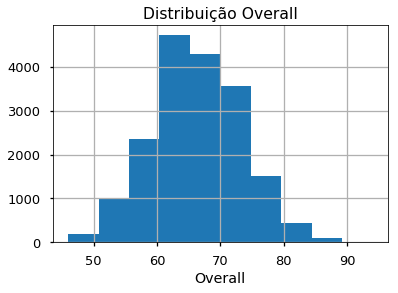

In [99]:
# Distribuição Overall

df.Overall.hist()
plt.xlabel('Overall')
plt.title('Distribuição Overall')
plt.show()

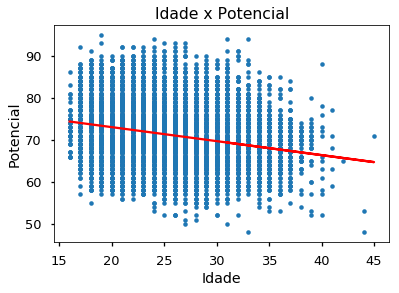

In [100]:
# Relação entre Idade e Potencial

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df1 = df.copy()
df1 = df1.dropna(subset=["Potential"])
df1 = df1[df['Age'].isin(range(0,70))]

# Definindo os valores de x e y
x = df1.Age
y = df1.Potential

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Potencial")
plt.title("Idade x Potencial")
plt.show()


In [101]:
# Média salarial por Clube

mediasalario = df.groupby('Club').Wage.mean().sort_values(ascending=False)
mediasalario


Club
Real Madrid               152.030303
FC Barcelona              146.575758
Juventus                  131.680000
Manchester City           113.363636
Manchester United         102.757576
Chelsea                    98.454545
Liverpool                  87.939394
Tottenham Hotspur          79.484848
FC Bayern München          78.827586
Arsenal                    78.424242
Milan                      72.481481
Paris Saint-Germain        72.033333
Napoli                     71.080000
Inter                      66.500000
Everton                    61.030303
Roma                       53.807692
West Ham United            53.750000
Atlético Madrid            46.454545
Bayer 04 Leverkusen        44.653846
Leicester City             43.906250
Fenerbahçe SK              39.533333
Olympique Lyonnais         38.793103
Lazio                      38.312500
Borussia Dortmund          38.121212
AS Monaco                  37.909091
Fiorentina                 34.958333
Watford                    34.896

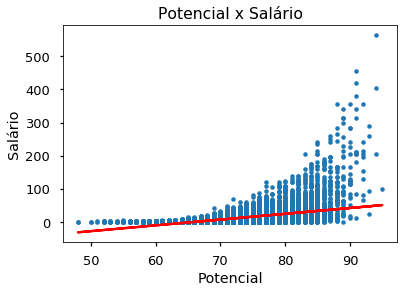

In [103]:
# Relação entre Salario e Potencial

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df2 = df.copy()
df2 = df2.dropna(subset=["Wage"])
df2 = df2[df['Potential'].isin(range(0,60000))]

# Definindo os valores de x e y
x = df1.Potential
y = df2.Wage

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Potencial")
plt.ylabel("Salário")
plt.title("Potencial x Salário")
plt.show()

Text(0.5, 1.0, 'Potencial dos Defensores')

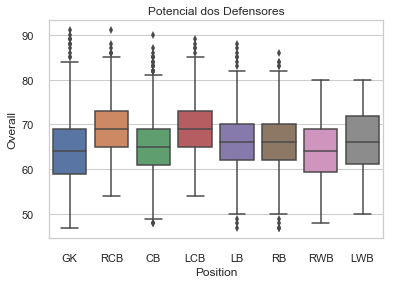

In [122]:
# Potencial por posição na Defesa
defesa = df.loc[df['Position'].isin(['GK','RWB','RB','RCB','CB','LCB','LB','LWB'])]
sns.boxplot(x=defesa['Position'],y=defesa['Overall']).set_title('Potencial dos Defensores')


Text(0.5, 1.0, 'Potencial dos Meio Campistas')

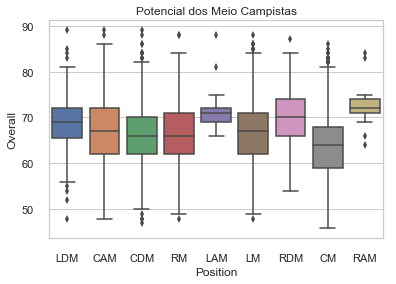

In [123]:
# Potencial por posição no Meio Campo
meiocampo = df.loc[df['Position'].isin(['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM'])]
sns.boxplot(x=meiocampo['Position'],y=meiocampo['Overall']).set_title('Potencial dos Meio Campistas')


Text(0.5, 1.0, 'Potencial dos atacantes')

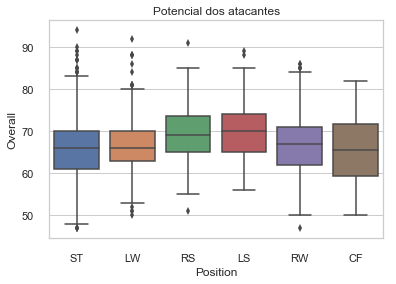

In [124]:
# Potencial por posição no Ataque
ataque = df.loc[df['Position'].isin(['RW','CF','LW','ST','RS','LS'])]
sns.boxplot(x=ataque['Position'], y=ataque['Overall']).set_title('Potencial dos atacantes')